PEMROSESAN TEKS
Kelas : 2023E
Kelompok : 11
Anggota Kelompok :

1.   Naza S. Wahda (23031554026)
2.   Salwa N. Az Zahrah (23031554136)
3. Salsabilla Indah R. (2303155193)



# **LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **PRE-PROCESSING**

In [4]:
file_path = '/content/dataset_komentar_instagram_cyberbullying.csv'
print(f"File '{file_path}' berhasil diunggah.")
df = pd.read_csv(file_path)

singkatan_dict = {
    "gk": "gak", "ga": "gak", "tdk": "tidak", "yg": "yang", "dlm": "dalam", "cowok": "laki-laki", "cewek": "perempuan", "tau": "tahu", "bedanya": "beda",
    "dmn": "dimana", "pd": "pada", "bgt": "banget", "dr": "dari", "pny": "punya", "celebgram": "selebgram", "nanya": "tanya", "beneran": "benar", "komen": "komentar",
    "dgn": "dengan", "dg": "dengan", "ngondek": "melambai", "emang": "memang", "tu": "itu", "trs": "terus", "aja": "saja", "udh": "sudah", "blm": "belum", "jd": "jadi", "ngga": "tidak",
    "lo": "kamu", "lu": "kamu", "ellu": "kamu", "gue": "saya", "lg": "lagi", "skr": "sekarang", "skrg": "sekarang", "kmrn": "kemarin", "d": "di",
    "gak": "tidak", "gini": "begini", "gitu": "begitu", "cpp": "calon pengantin pria", "cpw": "calon pengantin wanita", "msh": "masih", "bnyk": "banyak", "gw": "saya",
    "cri": "cari", "msuk": "masuk", "liat": "lihat", "knp": "kenapa", "jga": "juga", "ntar": "nanti", "tp": "tapi", "jgn": "jangan", "pls": "tolong", "plz": "tolong",
    "sm": "sama", "mksd": "maksud", "makasi": "terima kasih", "makasih": "terima kasih", "bencong": "melambai", "melambay": "melambai",
    "blg": "bilang", "org": "orang", "mlh": "malah", "krn": "karena", "dl": "dulu", "bngt": "banget", "selebgra": "selebgram",
    "trnyata": "ternyata", "hrs": "harus", "smg": "semoga", "dpt": "dapat", "tolol": "bodoh", "geblek": "bodoh", "termewek2": "menangis", "labil": "tidak konsisten",
    "hadewwwww": "", "anjir": "", "sakit jiwa": "tidak waras", "kalo": "kalau", "dih": "", "nya": "", "oon": "bodoh", "dlm": "dalam", "kyk": "seperti", "n": "dan",
    "indo": "indonesia", "jatoh": "jatuh", "klo": "kalau", "mba": "mbak", "att": "ayu ting ting", "dri": "dari", "human": "manusia", "mw": "mau", "lonte": "jalang", "ngomong": "omong",
    "sprti": "seperti", "ngungkapin": "mengungkapkan", "stupid": "bodoh", "kereenn": "keren", "kerenn": "keren", "piara": "pelihara", "lbh":"lebih", "pdhl":"padahal", "bnyk":"banyak","aplg":"apalagi",
    "oplas":"operasi plastik","aplod":"unggah"
}

def normalize_text(text):
    words = text.split()
    normalized_text = [singkatan_dict.get(word, word) for word in words]
    return ' '.join(normalized_text)

additional_stopwords = {
    "yang", "y", "yaa", "sok", "ma", "ko", "ni", "aj", "dari", "woyyyy", "gt", "d", "si", "sih", "ah", "oh", "jg", "nya", "ny", "untuk", "dengan", "pada", "juga", "dari", "ini", "itu", "atau",
    "kami", "saya", "kamu", "kita", "akan", "bisa", "tidak", "tanpa", "sudah", "banget", "picik", "kalau", "s", "dy", "kek", "min",
    "belum", "lebih", "hanya", "tersebut", "dan", "di", "ke", "dalam", "ada", "gw", "hahahaa", "wkwkwkwkw", "gak",
    "sebagai", "karena", "oleh", "saat", "setelah", "terjadi", "jika", "agar", "emng", "nih", "unek",
    "bahwa", "bagi", "antara", "pa", "dah", "emg", "ny", "sampai", "namun", "maka", "setiap", "bukan", "pake",
    "melalui", "sehingga", "ketika", "semua", "seperti", "tanpa", "lagi", "iya", "begini", "begitu","ih","b",
    "aja", "itu", "sih", "nya", "banget", "kalau", "deh", "nya", "biar", "tuh", "ama", "mlu", "username",
    "lah", "dong", "yah", "kayak", "gimana", "loh", "udah", "tapi", "ntar", "duhhh", "ya", "didalem", "di dalem", "diluar", "di luar", "di depan", "didepan", "masyako"
}

stop_words = set(stopwords.words('indonesian')).union(additional_stopwords)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\$\w*', ' ', text)
    text = re.sub(r'^RT[\s]+', ' ', text)
    text = re.sub(r'https?://[^\s\n\r]+', ' ', text)
    text = re.sub(r'(?:\@|https?\://)\S+', ' ', text)
    text = re.sub(r'#[A-Za-z0-9]+', ' ', text)
    text = re.sub(r'[^\x00-\x7f]', ' ', text)
    text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))
    text = text.strip()
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    text = re.sub(r'\b(?:ha|he|hi|ho|hu|wkwk|wkw|hihi)+\b', ' ', text)
    text = re.sub(r'\b(?:ha|he|hi|ho|hu|wk|eh|ee|eh)+\b', ' ', text)
    text = re.sub(r'\b(?:ye|yo|ya|ho|wo|hu|ko|xixix)+\b', ' ', text)

    normalized_text = normalize_text(text)
    word_tokens = word_tokenize(normalized_text)
    filtered_text = [word for word in word_tokens if word not in stop_words]

    return ' '.join(filtered_text)

data = pd.DataFrame(df)
data['cleaned_comment'] = data['Instagram Comment Text'].apply(clean_text)
print(data[['Instagram Comment Text', 'cleaned_comment']].to_string(index=False))

File '/content/dataset_komentar_instagram_cyberbullying.csv' berhasil diunggah.
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Instagram Comment Text                                

# **FEATURE ENGINEERING**

## Vektorisasi menggunakan TF-IDF

In [5]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['cleaned_comment']).toarray()

print("Hasil TF-IDF:")
tfidf = pd.DataFrame(X)
tfidf

Hasil TF-IDF:


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.279695,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Standarisasi Data

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
std=pd.DataFrame(X_scaled)
std[:5]

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.085468,-0.070888,-0.070846,-0.070782,-0.069264,-0.080798,-0.089464,-0.118323,-0.070105,-0.070013,...,-0.069851,-0.066275,-0.070536,-0.097137,-0.062367,-0.08436,-0.050063,-0.084567,-0.050063,-0.079869
1,-0.085468,-0.070888,-0.070846,-0.070782,-0.069264,-0.080798,-0.089464,-0.118323,-0.070105,-0.070013,...,-0.069851,-0.066275,-0.070536,-0.097137,-0.062367,-0.08436,-0.050063,-0.084567,-0.050063,-0.079869
2,-0.085468,-0.070888,-0.070846,13.310355,-0.069264,-0.080798,-0.089464,-0.118323,-0.070105,-0.070013,...,-0.069851,-0.066275,-0.070536,-0.097137,-0.062367,-0.08436,-0.050063,-0.084567,-0.050063,-0.079869
3,-0.085468,-0.070888,-0.070846,-0.070782,-0.069264,-0.080798,-0.089464,-0.118323,-0.070105,-0.070013,...,-0.069851,-0.066275,-0.070536,-0.097137,-0.062367,-0.08436,-0.050063,-0.084567,-0.050063,-0.079869
4,-0.085468,-0.070888,-0.070846,-0.070782,-0.069264,-0.080798,-0.089464,-0.118323,-0.070105,-0.070013,...,-0.069851,-0.066275,-0.070536,-0.097137,-0.062367,-0.08436,-0.050063,-0.084567,-0.050063,-0.079869


# **CLUSTERING**

## Hierarchical Clustering

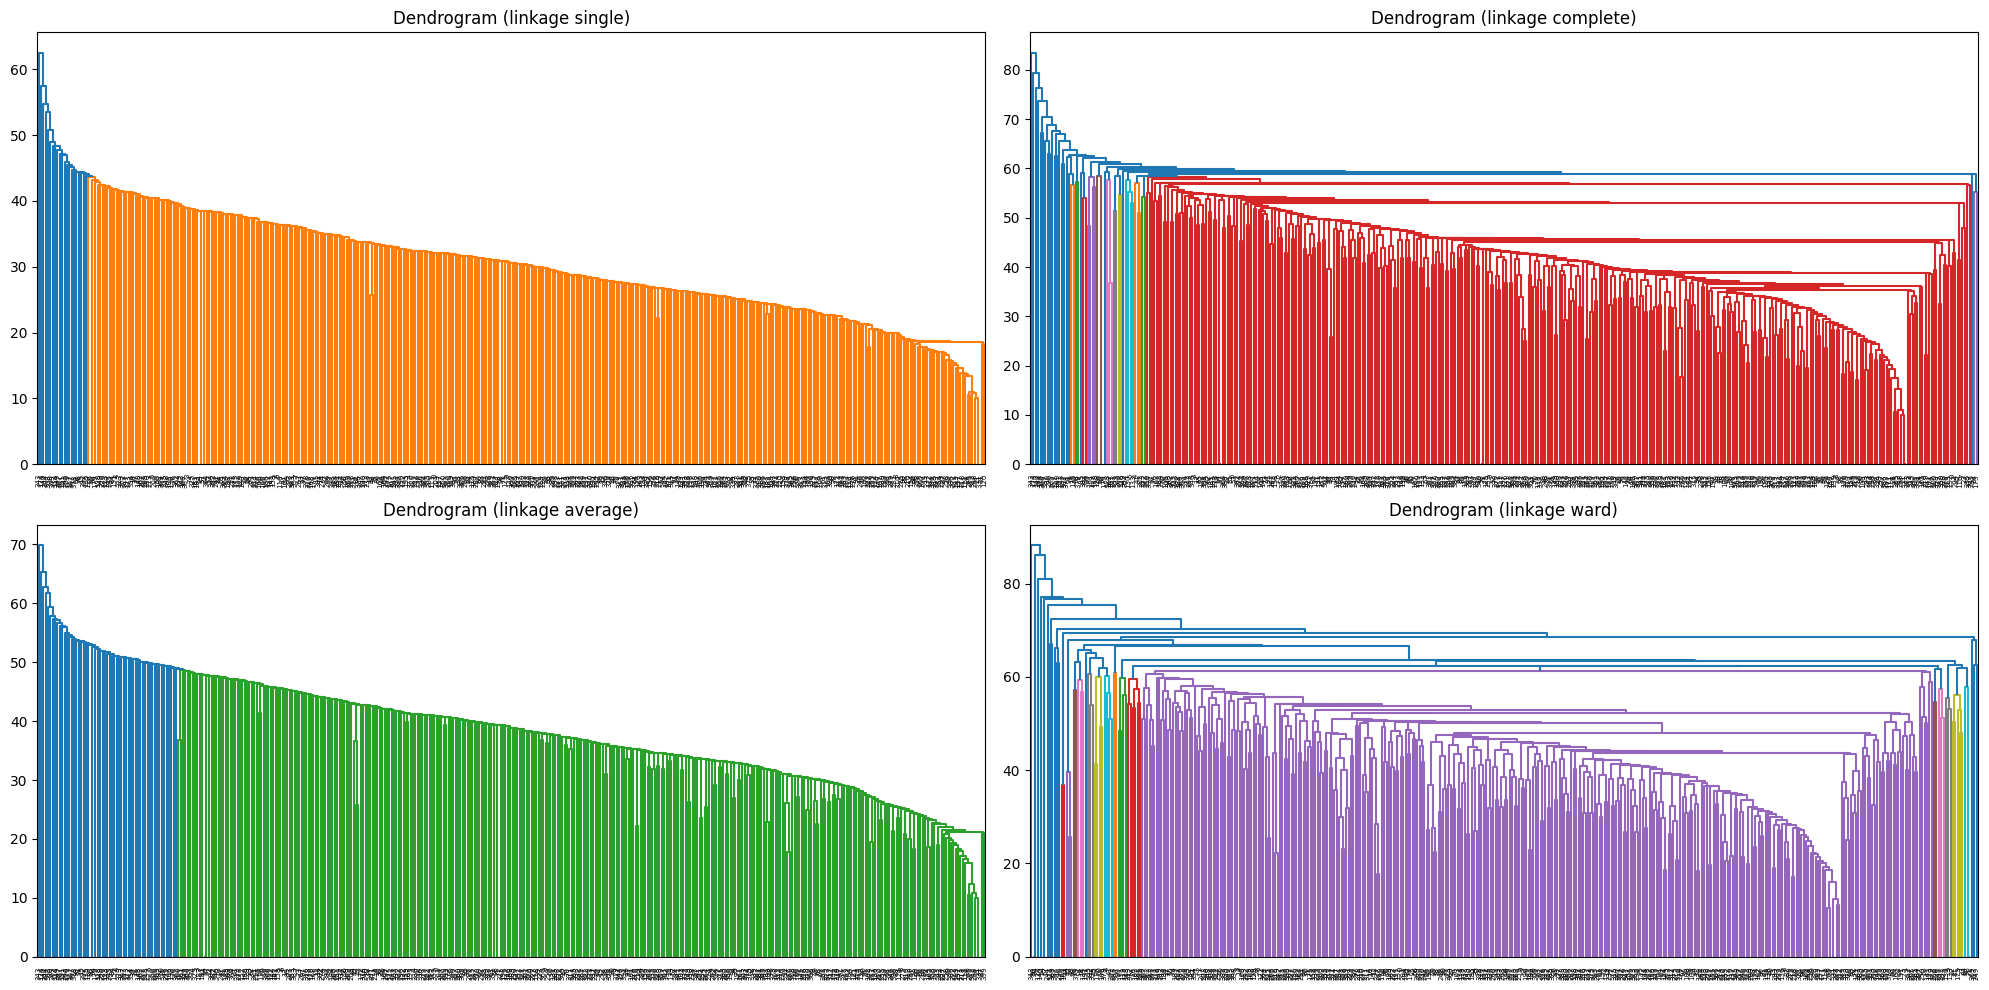

In [7]:
metode_linkage = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(20, 10))
for i, metode in enumerate(metode_linkage):
    plt.subplot(2, 2, i + 1)
    Z = linkage(X_scaled, method=metode, metric='euclidean')
    dendrogram(Z)
    plt.title(f'Dendrogram (linkage {metode})')
plt.tight_layout()
plt.show()

## K-Means

In [8]:
range_n_clusters = range(2, 11)
inertia = []
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels, metric='euclidean')
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score untuk {n_clusters} klaster: {silhouette_avg:.4f}")

Silhouette Score untuk 2 klaster: 0.2042
Silhouette Score untuk 3 klaster: 0.0219
Silhouette Score untuk 4 klaster: -0.0796
Silhouette Score untuk 5 klaster: -0.0792
Silhouette Score untuk 6 klaster: -0.0786
Silhouette Score untuk 7 klaster: -0.0779
Silhouette Score untuk 8 klaster: -0.0830
Silhouette Score untuk 9 klaster: -0.0823
Silhouette Score untuk 10 klaster: -0.0814


### Metode Elbow

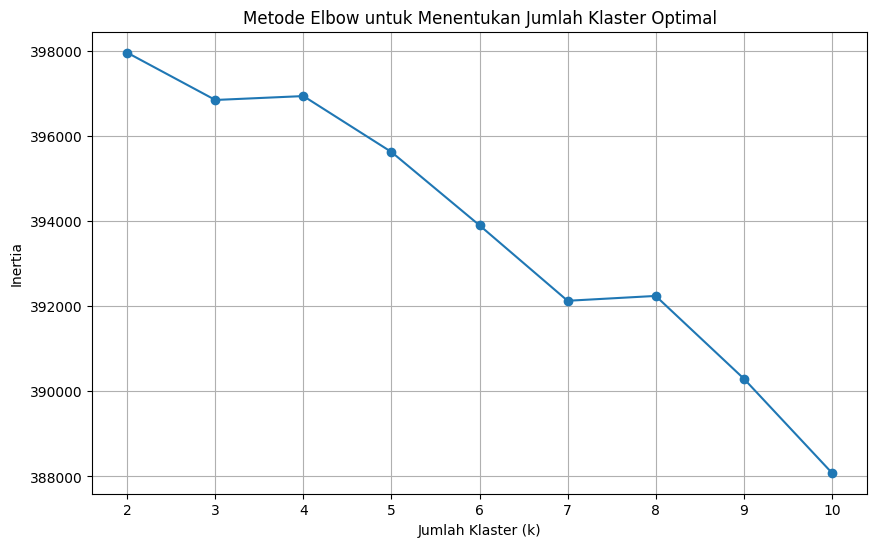

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.grid()
plt.show()

### Metode Silhouette Score
Untuk menentukan cluster optimal

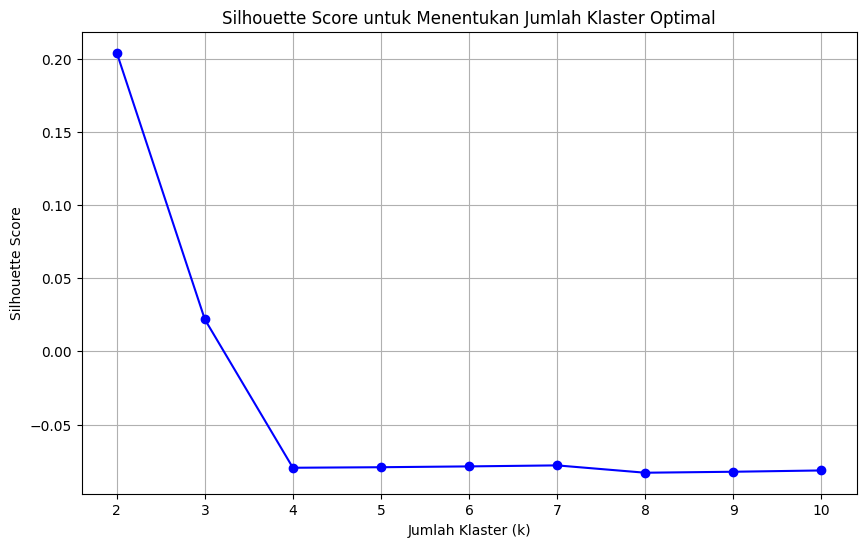

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, 'bo-')
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Menentukan Jumlah Klaster Optimal")
plt.grid()
plt.show()

### Klaster Optimal

#### K-Means

In [11]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42).fit(X_scaled)
data['KMeans_Labels'] = kmeans.labels_

print("Label klaster untuk setiap data:")
pd.DataFrame(data[['Instagram Comment Text', 'cleaned_comment', 'KMeans_Labels']])

Label klaster untuk setiap data:


,Instagram Comment Text,cleaned_comment,KMeans_Labels
0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,bodoh hubungan keguguran hijab syar i bilang b...,3
1,Geblek lo tata...cowo bgt dibela2in balikan......,bodoh tata cowo dibela in balikan hadeww ditin...,3
2,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kemarin termewek lengket duhh konsisten mbak k...,3
3,"Intinya kalau kesel dengan ATT nya, gausah ke ...",intinya kesel ayu ting ting gausah anaknya kas...,3
4,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadeww permpuan sakit jiwa peran utama film ha...,3
...,...,...,...
395,Bangga sama suami yg selalu ingat istri disela...,bangga suami istri disela apapun profesimu kau...,3
396,Apaoun pekerjaannya yg penting halal u tuk men...,apaoun pekerjaannya halal u tuk menafkahi kelu...,3
397,Gojek itu mayoritas pegangguran yang lama gak ...,gojek mayoritas pegangguran kerja trus putus a...,3
398,<USERNAME> aslinya cantik dan ayu loh mbak kr...,aslinya cantik ayu mbak bertemu langsung sesem...,3


####  Silhouette Score untuk Klaster Optimal

In [12]:
silhouette_optimal = silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')
print(f"\nSilhouette Score untuk {optimal_clusters} klaster: {silhouette_optimal:.4f}")



Silhouette Score untuk 4 klaster: -0.0796


## WORD CLOUD


KMeans untuk klaster 0


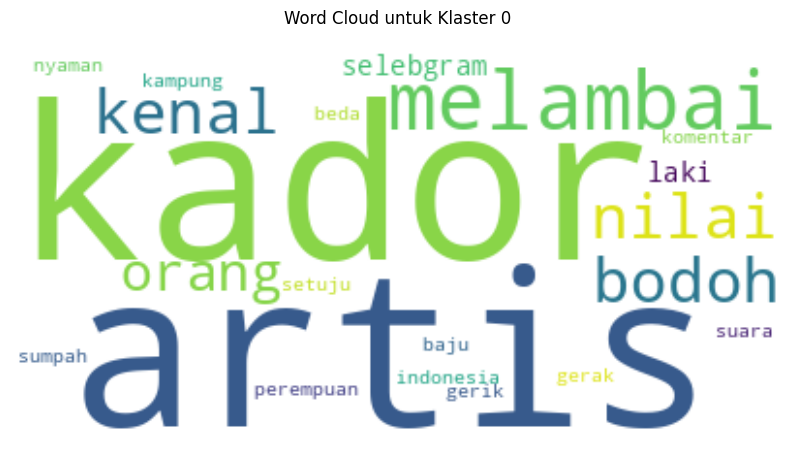


KMeans untuk klaster 1


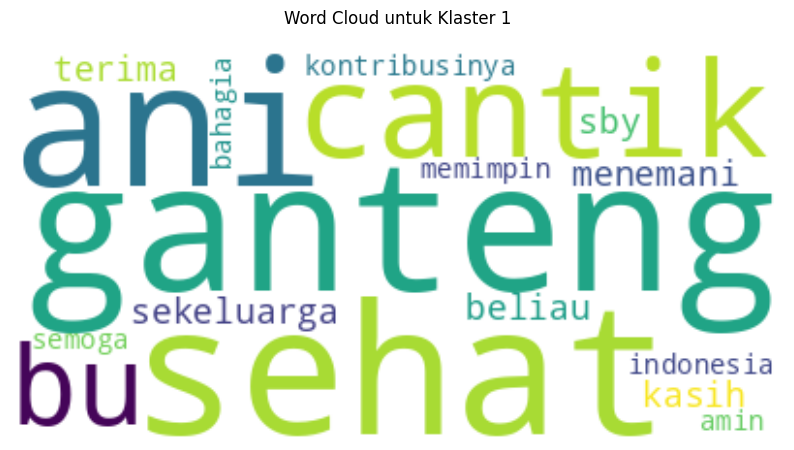


KMeans untuk klaster 2


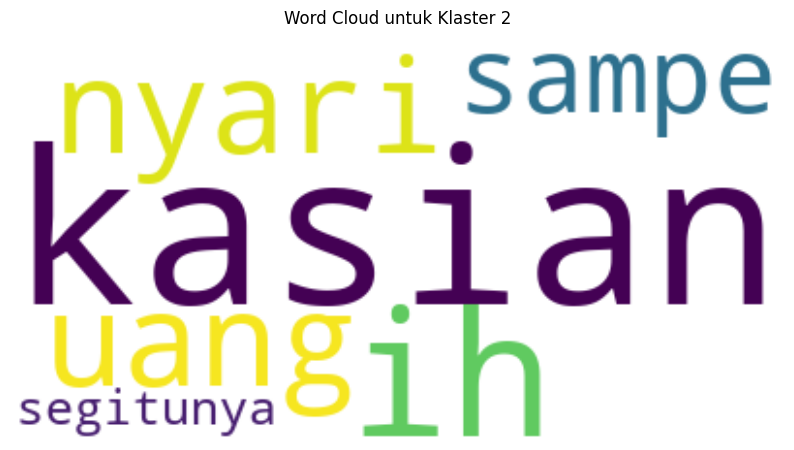


KMeans untuk klaster 3


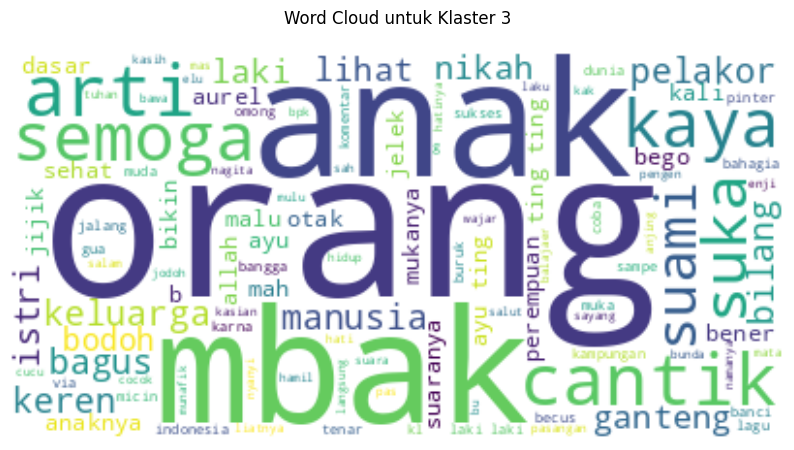

In [13]:
df_Kmeans = data.copy(deep=True)
df_Kmeans['cluster'] = kmeans.labels_

for c in range(optimal_clusters):
    print(f'\nKMeans untuk klaster {c}')
    df_c = df_Kmeans[df_Kmeans['cluster'] == c]
    df_c
    long_string = ','.join(list(df_c['cleaned_comment'].values))

    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    wordcloud.generate(long_string)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud untuk Klaster {c}\n')
    plt.show()
